In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.set_logical_device_configuration(
        gpus[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=5820)])
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)
else:
  print("GPU not Available")

GPU not Available


In [3]:
train, test = tf.keras.datasets.mnist.load_data()

In [4]:
def load_data(data):
    X, y = data
    X = X.reshape(-1, 28, 28, 1)
    X = X / 255.0
    encodings = tf.keras.utils.to_categorical(y)
    return pd.DataFrame(zip(X, y, encodings), columns=['Image', 'Class', 'Encoding'])

In [5]:
train = load_data(train)
test = load_data(test)

In [6]:
train.head()

,Image,Class,Encoding
0,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",5,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",4,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


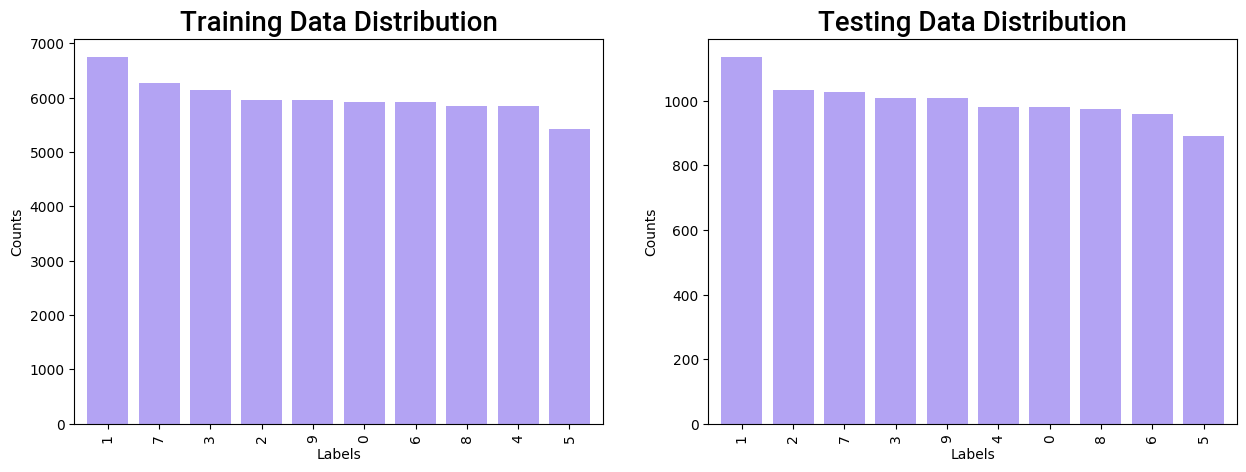

In [7]:
plt.figure(figsize=(15, 5))
for i, df in enumerate([train, test]):
    plt.subplot(1, 2, i+1)
    df['Class'].value_counts().plot.bar(color="#B3A3F3", width=0.8)
    plt.xlabel("Labels")
    plt.ylabel("Counts")
    plt.title(f"{"Testing" if i else "Training"} Data Distribution", fontdict={'fontsize': 20, 'fontfamily': 'Roboto', 'fontweight': 'semibold'})

In [8]:
classes = train['Class'].unique()
classes

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8], dtype=uint8)

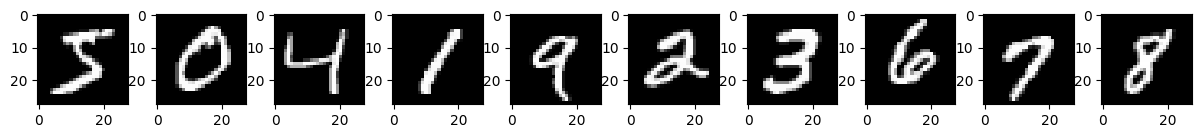

In [9]:
plt.figure(figsize=(15, 4))
for i, c in enumerate(classes):
    img = train[train['Class'] == c].iloc[0]['Image'].astype(np.float32) * 255
    plt.subplot(3, 10, i+1)
    plt.imshow(Image.fromarray(img.squeeze()))
    plt.grid(False)
    
plt.show()

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax') 
])

c:\Users\Rahul\Desktop\Digits\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adamax

model.compile(optimizer=Adamax(0.001), loss='categorical_crossentropy', metrics=['accuracy',  TopKCategoricalAccuracy(3), Precision(), Recall()])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,274 (872.16 KB)

 Trainable params: 223,274 (872.16 KB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Rahul\Desktop\Digits\env\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


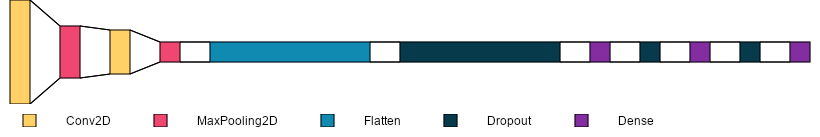

In [13]:
from PIL import ImageFont
from visualkeras import layered_view

font = ImageFont.truetype("arial.ttf", 12)
layered_view(model, legend=True, font=font, draw_volume=False,spacing=30)

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath = "Models/model_epoch_{epoch:02}.keras",
    save_weights_only = False,
    save_best_only = False,
    monitor = 'val_loss',
    mode = 'min',
    verbose = 0
)

In [15]:
import tensorflow.keras.backend as K
K.clear_session()

In [16]:
train.head()

,Image,Class,Encoding
0,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",5,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",4,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",1,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",9,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [17]:
X_train = np.array(train['Image'].tolist())
y_train = np.array(train['Encoding'].tolist())

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[checkpoint],
    batch_size=32
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7520 - loss: 0.7811 - precision: 0.8849 - recall: 0.6345 - top_k_categorical_accuracy: 0.8963 - val_accuracy: 0.9668 - val_loss: 0.1088 - val_precision: 0.9755 - val_recall: 0.9596 - val_top_k_categorical_accuracy: 0.9946
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9542 - loss: 0.1586 - precision: 0.9656 - recall: 0.9446 - top_k_categorical_accuracy: 0.9930 - val_accuracy: 0.9781 - val_loss: 0.0745 - val_precision: 0.9825 - val_recall: 0.9740 - val_top_k_categorical_accuracy: 0.9961
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9676 - loss: 0.1090 - precision: 0.9738 - recall: 0.9617 - top_k_categorical_accuracy: 0.9964 - val_accuracy: 0.9834 - val_loss: 0.0596 - val_precision: 0.9857 - val_recall: 0.9809 - val_top_k_categorical_accuracy: 0.9970
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9733 - loss: 0.0881 - precision: 0.9775 - recall: 0.9686 - top

In [18]:
import json
with open("Logs/training.json", 'w') as f:
    json.dump(history.history, f)

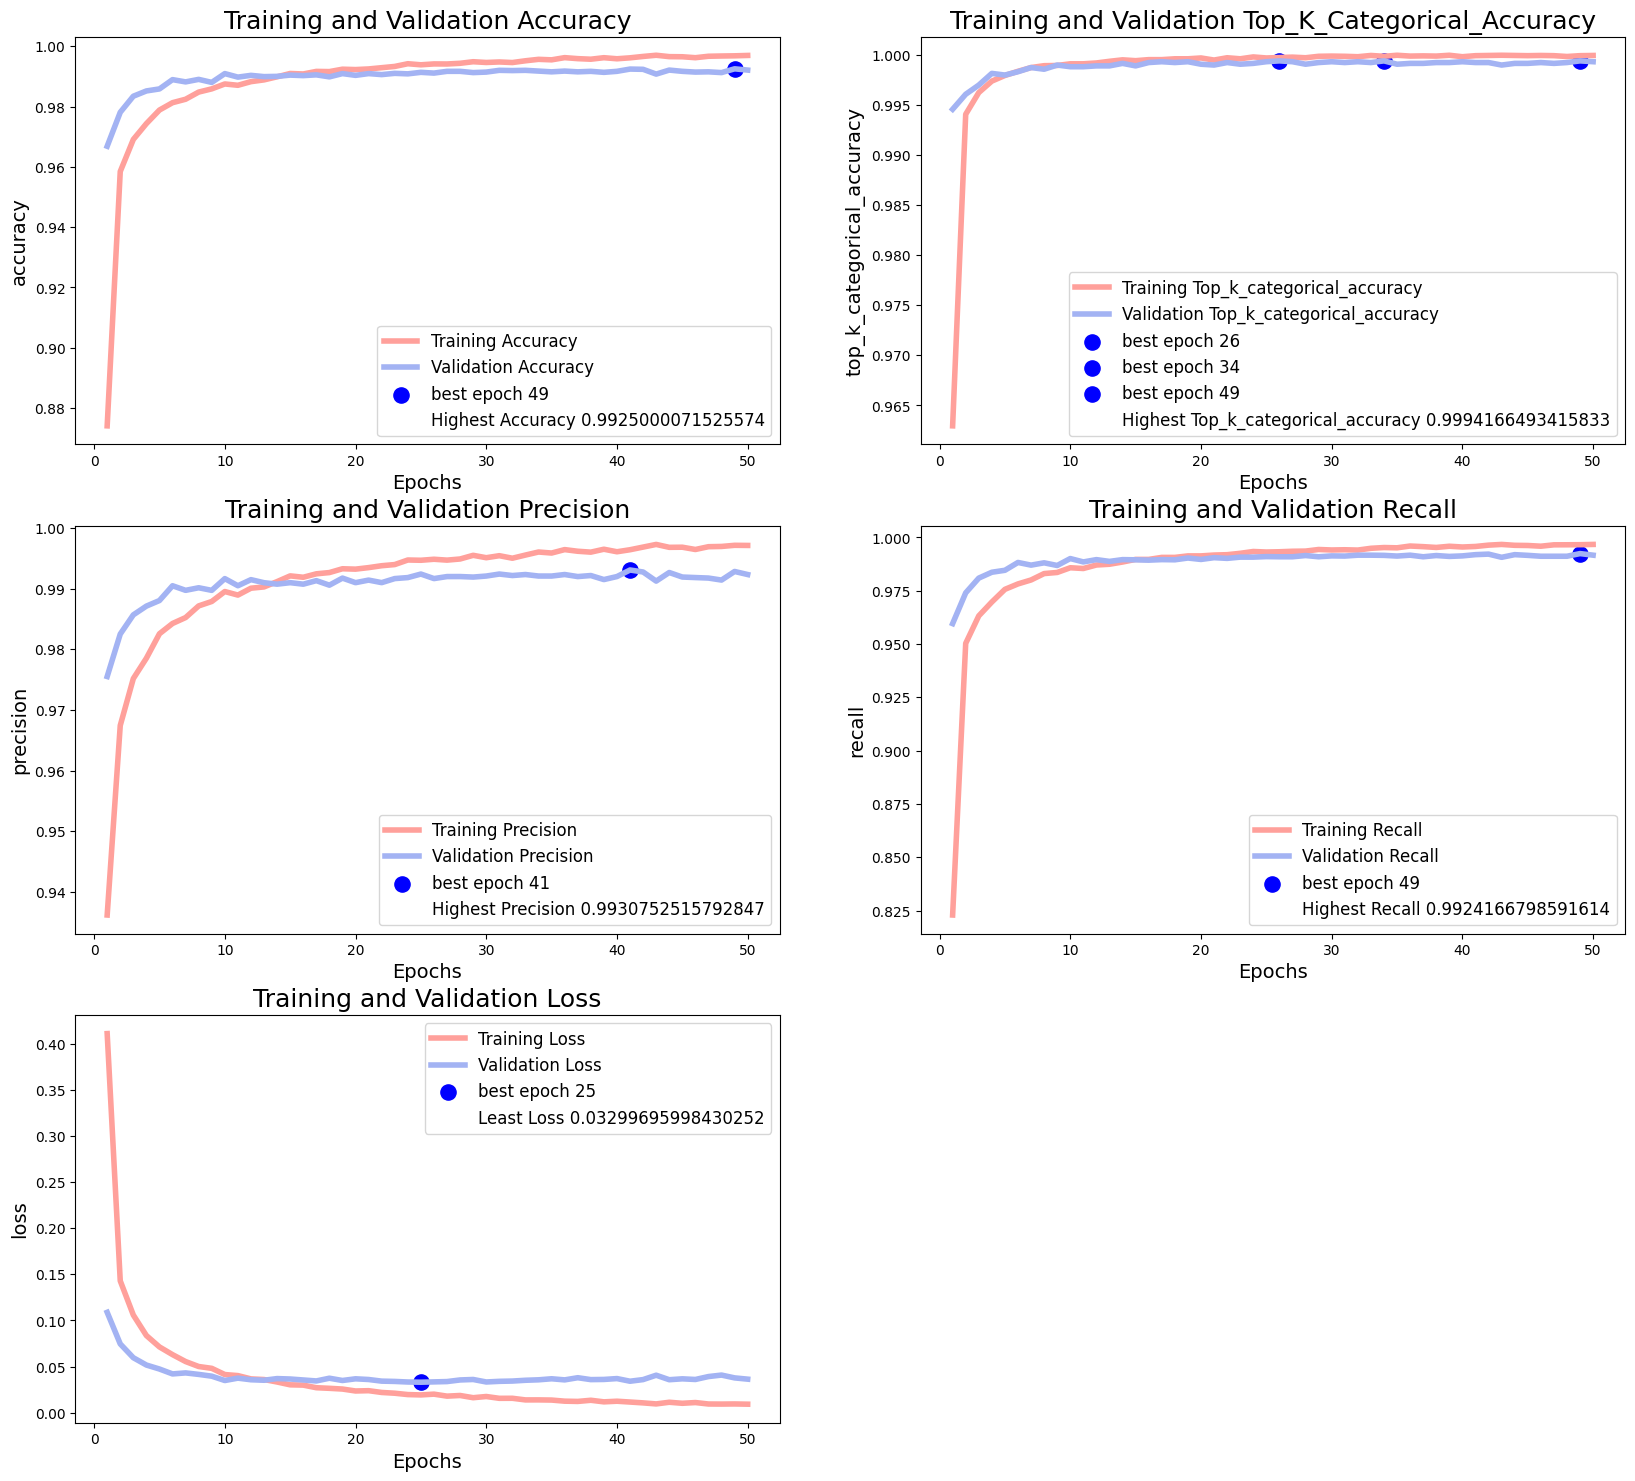

In [19]:
hist = history.history
TRAIN_CLR = '#FFA09B'
VAL_CLR  = '#A3B3F3'
BEST_CLR = 'b'

plt.style.reload_library()
epochs = [i for i in range(1, len(hist['loss'])+1)]
plt.figure(figsize=(20, 18))

for i, m in enumerate(['accuracy', 'top_k_categorical_accuracy', 'precision', 'recall', 'loss']):
    train_values = hist[m]
    val_values = hist[f'val_{m}']
    if m == 'loss':
        best_value = np.min(val_values)
    else:
        best_value = np.max(val_values)
    best_epochs = [j for j, v in enumerate(val_values) if v == best_value]

    plt.subplot(3, 2, i+1)
    plt.plot(epochs, train_values, color=TRAIN_CLR, label = f"Training {m.capitalize()}", linewidth=4)
    plt.plot(epochs, val_values, color=VAL_CLR, label = f"Validation {m.capitalize()}", linewidth=4)
    for e in best_epochs:
        plt.scatter(e+1, best_value, color=BEST_CLR, s=120, label=f'best epoch {e+1}')
    plt.scatter(best_epochs[0]+1, best_value, color=BEST_CLR, s=0, label=f"{'Least' if m == 'loss' else 'Highest'} {m.capitalize()} {best_value}")
    plt.title(f"Training and Validation {m.title()}", fontdict={'size':18})
    plt.xlabel('Epochs', fontdict={'size':14})
    plt.ylabel(m, fontdict={'size':14})
    plt.legend(fontsize=12)

# Testing

In [20]:
test_results = {'loss': [], 'accuracy': [], 'top_k_categorical_accuracy': [], 'precision': [], 'recall':[]}

In [21]:
import os
from tensorflow.keras.models import load_model

X_test = np.array(test['Image'].tolist())
y_test = np.array(test['Encoding'].tolist())

for path in os.listdir('Models'):
    if path.endswith('.keras'):
        mod = load_model(os.path.join("Models", path))
        score = mod.evaluate(X_test, y_test, verbose=0)
        for i, key in enumerate(test_results.keys()):
            test_results[key].append(score[i])

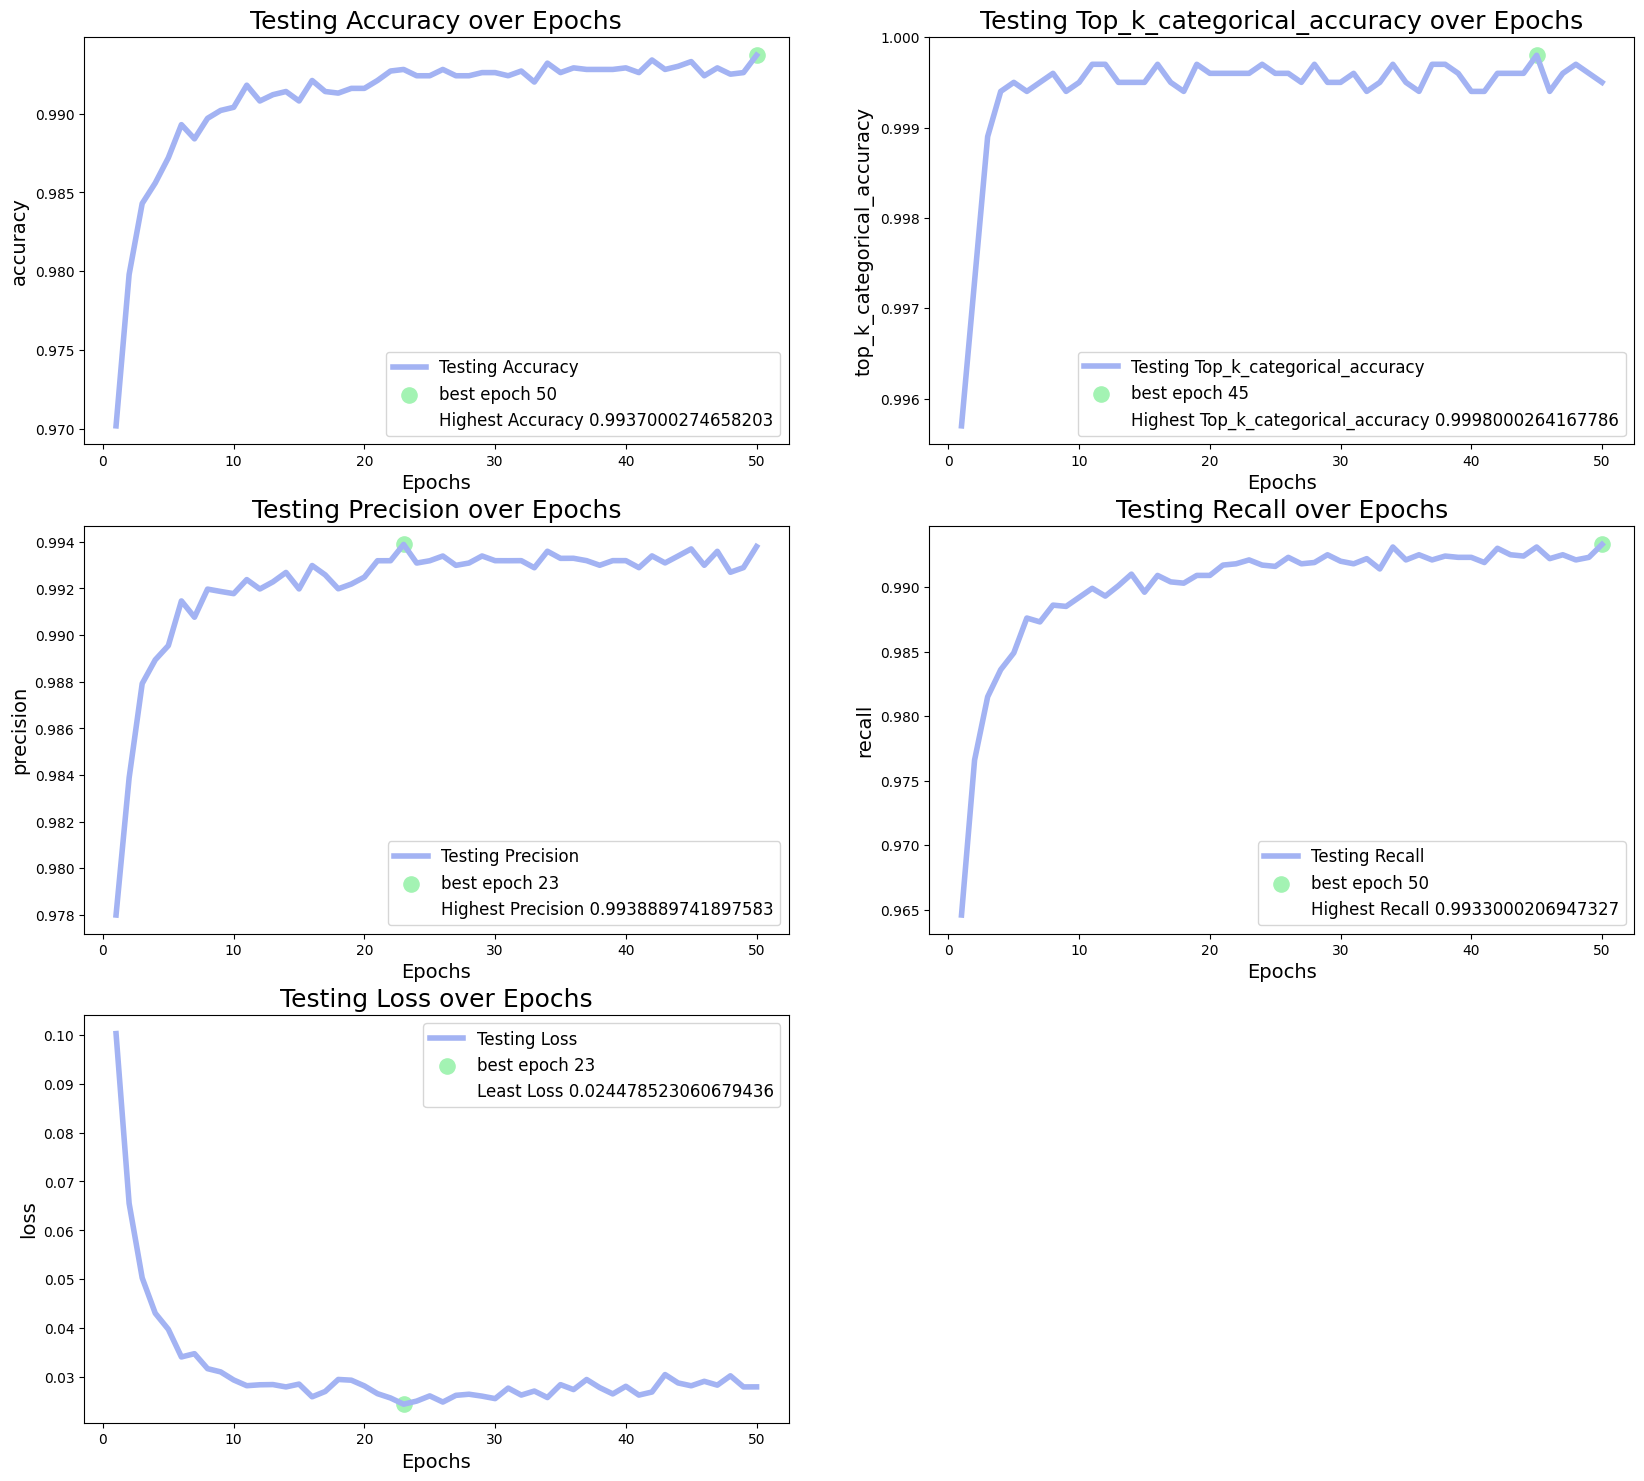

In [22]:
TEST_CLR  = '#A3B3F3'
BEST_CLR = '#A3F3B3'

epochs = [i for i in range(1, len(test_results['loss'])+1)]
plt.figure(figsize=(20, 18))
for i, m in enumerate(['accuracy', 'top_k_categorical_accuracy', 'precision', 'recall', 'loss']):
    values = test_results[m]
    if m == 'loss':
        best_value = np.min(values)
    else:
        best_value = np.max(values)
    best_epochs = [j for j, v in enumerate(values) if v == best_value]

    plt.subplot(3, 2, i+1)
    plt.plot(epochs, values, color=TEST_CLR, label = f"Testing {m.capitalize()}", linewidth=4)
    for e in best_epochs:
        plt.scatter(e+1, best_value, color=BEST_CLR, s=120, label=f'best epoch {e+1}')
    plt.scatter(best_epochs[0]+1, best_value, color=BEST_CLR, s=0, label=f"{'Least' if m == 'loss' else 'Highest'} {m.capitalize()} {best_value}")
    plt.title(f"Testing {m.capitalize()} over Epochs", fontdict={'size':18})
    plt.xlabel('Epochs', fontdict={'size':14})
    plt.ylabel(m, fontdict={'size':14})
    plt.legend(fontsize=12)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [24]:
from tensorflow.keras.models import load_model
model = load_model(r"Models\model_epoch_50.keras")

In [25]:
X_test = np.array(test['Image'].tolist())
y_test = np.array(test['Encoding'].tolist())

In [26]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


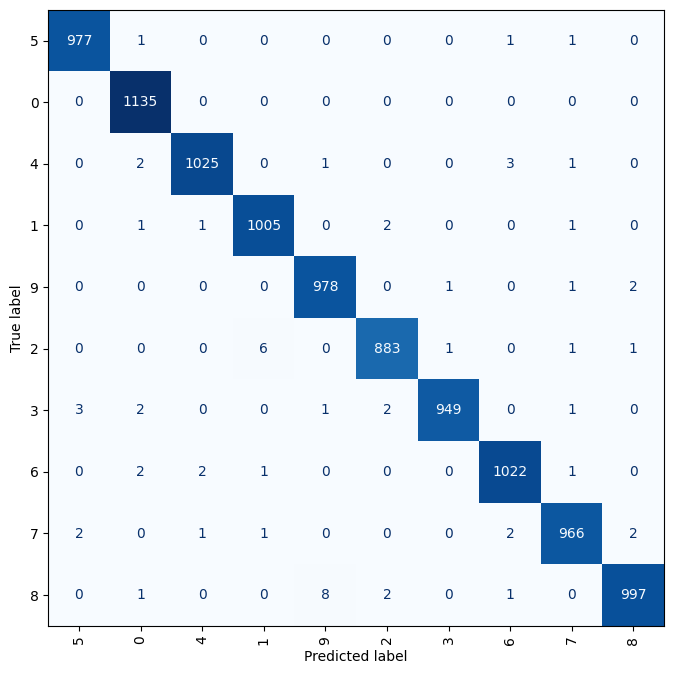

In [29]:
conf = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=classes)
fig = plt.figure(figsize=(8, 8))
disp.plot(colorbar=False, cmap=plt.cm.Blues, ax=fig.subplots(1, 1), xticks_rotation='vertical')